## Capstone Project                                                                       : Machine Leanrning Nano Degree

## Media Product Classification
### by Nagaraju Budigam




### Project Overview

> Note: This is the original problem that I am developing at production level. Due to company compliance original datasets were not exposed, the provided datasets are resembling the original datasets.

> Indix hosts the world’s largest collection of programmatically accessible structured product information in the cloud. The products in our database belong to 25 verticals and that translates approximately to 6000 sub-categories. Every product that we carry in our database gets stamped with information about the “category” it belongs to. 


### Problem Statement

> Aim of the problem is to classifying a product into a particular category is very important to serve various use cases – like, helping search, performing product matching, providing category specific insights, and so on. The problem of stamping every product in our catalogue into a category is a Multi Label Hierarchical Classification problem. Your challenge is to build a micro version of this classifier where you will predict 4 classes.


# Load the Data

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

#load the training data
training_dataset=pd.read_csv('train.csv')

#show first few rows
training_dataset.head()

,storeId,url,additionalAttributes,breadcrumbs,label
0,23,http://www.walmart.com/ip/best-of-toto%3A-pian...,Contributed by=Toto;Format=Paperback;Number of...,books > art music & photography > music,books
1,NaN,NaN,NaN,best buy > computers & tablets > computer card...,rest
2,23,https://www.walmart.com/ip/34441317,Performer=Cult Of Youth;Record Label=Vinyl;1.=...,music on cd or vinyl > rock music on cd or vin...,music
3,26,https://www.overstock.com/Books-Movies-Music-G...,Format=Paperback;Copyright Year=2000;Publisher...,books & media > books > cooking & food books >...,books
4,22,http://www.target.com/p/amore-version-ii/-/A-1...,Store Item Number (DPCI)=244-48-2721;Origin=Ma...,"target > movies, music & books > music > class...",music


## Feature Selection
> * It is straing forward that store id, url and additional attribute features (**most of these feautres are NaNs**) don't contribute to predict the lable.
> * The feature **breadcrumbs is sufficent to determines lable of the unknown data**.


## Data Pre-processing
> * Drop all NaN rows of breadcrumbs and lable columns
> * Drop all duplicate rows
> * Remove all the speacial characters in breadcrumbs (will be taken care during tokenization)

In [3]:
#requuired colums breadcrumbs and lables
final_col_list=['breadcrumbs','label']

# now training_dataset has only breadcrumbs and lable columms
training_dataset=training_dataset[final_col_list]

print('Original Dataset size : ',training_dataset.shape[0])

# Drop NaN rows, if any
training_dataset.dropna(how='any',inplace=True)
print('Dataset size after noise removal: ',training_dataset.shape[0])

training_dataset.drop_duplicates(inplace=True)
print('Dataset size after duplcate removal: ',training_dataset.shape[0])

# show the first few rows of cleaned data set
training_dataset.head()

Original Dataset size :  603201
Dataset size after noise removal:  599800
Dataset size after duplcate removal:  63126


,breadcrumbs,label
0,books > art music & photography > music,books
1,best buy > computers & tablets > computer card...,rest
2,music on cd or vinyl > rock music on cd or vin...,music
3,books & media > books > cooking & food books >...,books
4,"target > movies, music & books > music > class...",music


## Data Exploration
> * **Unbalanced dataset**

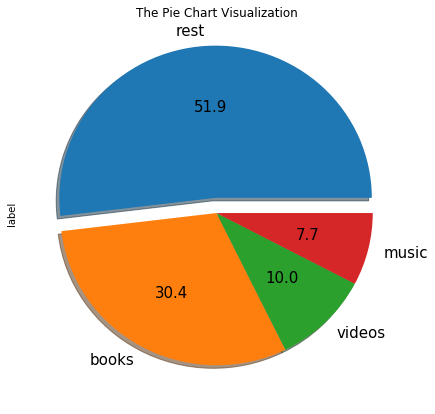

In [4]:
# plot pie chart to visualize the data
training_dataset.label.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pie Chart Visualization',explode=(0.1,0,0,0),fontsize=15)

## Encode Labels

In [5]:
# Encode or Transform the categorial labels into numrical values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(training_dataset.label)
training_dataset.label=le.transform(training_dataset.label) 

# show first few lines after encoding labels
training_dataset.head()

,breadcrumbs,label
0,books > art music & photography > music,0
1,best buy > computers & tablets > computer card...,2
2,music on cd or vinyl > rock music on cd or vin...,1
3,books & media > books > cooking & food books >...,0
4,"target > movies, music & books > music > class...",1


## Training and Testing Data Split

In [6]:
from sklearn.model_selection import train_test_split

#Divide the data into trainign and test sets
X_train, X_test, y_train, y_test = train_test_split(training_dataset.breadcrumbs, 
                                                    training_dataset.label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ('Training set has',X_train.shape[0],'samples.')
print ("Testing set has ",X_test.shape[0]," samples.")

Training set has 50500 samples.
Testing set has  12626  samples.


## Transform the data into Numerical Form
> * Construct a Document Term Matrix
> * Construct Bag of Words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string

def tokenize(sentence):
    sentence=sentence.translate(str.maketrans('','',string.punctuation))
    tokens=nltk.word_tokenize(sentence)
    return tokens

count_vec=CountVectorizer(tokenizer=tokenize)
X_train=count_vec.fit_transform(X_train) # traiing data
X_test=count_vec.transform(X_test) # test data

## Performance Metrics Visualization

In [7]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test,verbose): 
    results = {}
    training_start = time()
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    training_end = time() 
    results['train_time'] = training_end-training_start
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time()
    results['pred_time'] = end-start
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train[:sample_size])
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train[:sample_size], beta=0.5,average='macro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5,average='macro')
    # Success
    if(verbose):
        print ("{} trained on {} samples with accuracy {} and fbeta score {}%".
               format(learner.__class__.__name__, sample_size,(100.0*results['acc_test']),(100.0*results['f_test'])))
        #print (results)
    return results

def evaluate(results):
    fig, ax = pl.subplots(2, 3, figsize = (20,8))
    bar_width = 0.19
    colors = ['#F55826','#00A0A0','#E5B506','#284ABC','#59A857']
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training Time")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Prediction Time")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.55), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics of Supervised Learning Models", fontsize = 18, y = 1.10)
    pl.tight_layout()
    pl.show()
    
final_results={}
def metrics_visualization(clfs,verbose):
    results = {}
    samples_100 = len(y_train)
    samples_10 = int((samples_100*0.1))
    samples_1 = int((samples_100*0.01))
    for clf in clfs:
        clf_name = clf.__class__.__name__
        results[clf_name] = {}
        final_results[clf_name] = {}
        for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test,verbose)
            final_results[clf_name][i]= results[clf_name][i]

    evaluate(results)    

## Train the model

DecisionTreeClassifier trained on 505 samples with accuracy 95.75479169966735 and fbeta score 96.93308902908835%
DecisionTreeClassifier trained on 5050 samples with accuracy 99.36638682084588 and fbeta score 99.29802713370957%
DecisionTreeClassifier trained on 50500 samples with accuracy 99.86535719942975 and fbeta score 99.87460142649547%
LinearSVC trained on 505 samples with accuracy 97.41802629494694 and fbeta score 97.78882255883185%
LinearSVC trained on 5050 samples with accuracy 99.53271028037383 and fbeta score 99.50121231455074%
LinearSVC trained on 50500 samples with accuracy 99.87327736416918 and fbeta score 99.87816691132504%
RandomForestClassifier trained on 505 samples with accuracy 95.62806906383653 and fbeta score 95.76924785466842%
RandomForestClassifier trained on 5050 samples with accuracy 99.3426263266276 and fbeta score 99.30148461333724%
RandomForestClassifier trained on 50500 samples with accuracy 99.82575637573261 and fbeta score 99.7103523015595%
MultinomialNB t

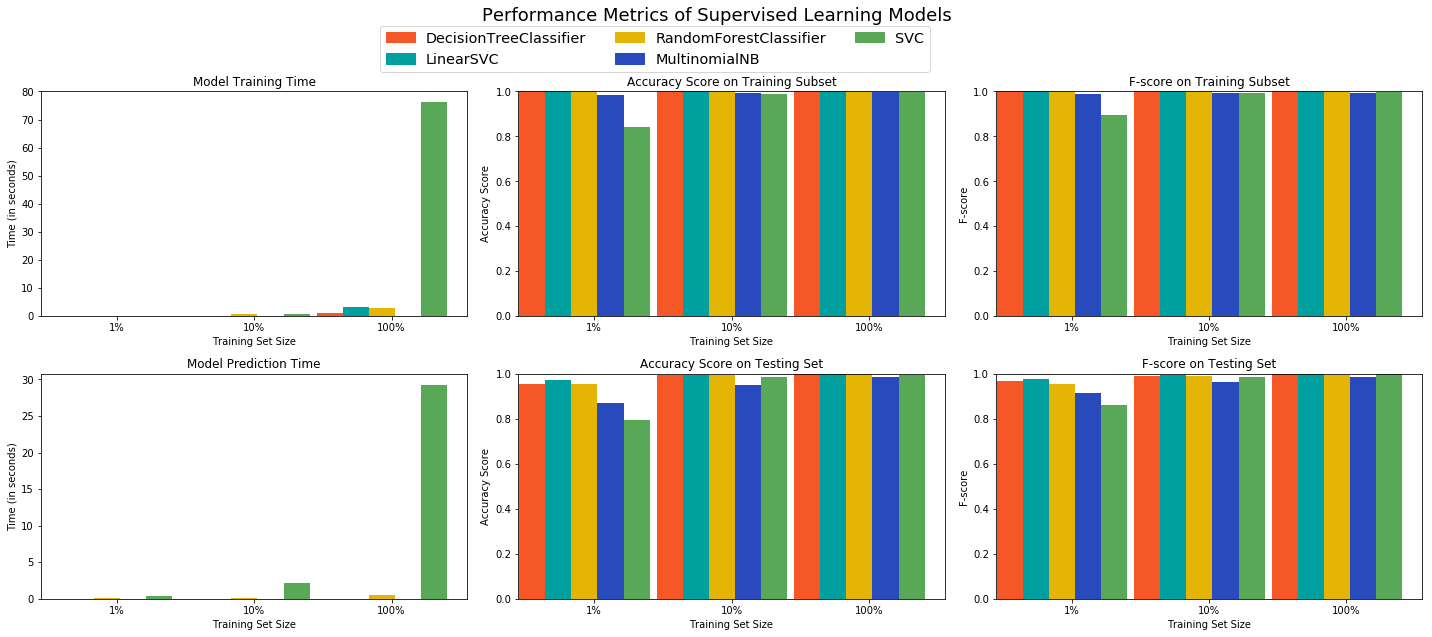

In [17]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import math

classifiers=[
DecisionTreeClassifier(random_state=1),
LinearSVC(random_state=1),
RandomForestClassifier(random_state=1),
MultinomialNB(),
SVC(kernel="linear", C=0.025)]

metrics_visualization(classifiers[:5],verbose=True)

## Model Selection and Hyper Parameter Tuning

In [15]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

#Initialize the classifier
clf = DecisionTreeClassifier(random_state=1)

parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2,3],
              "max_depth": [None, 2,3,4,5]
              }

scorer = make_scorer(fbeta_score,beta=0.5,average='macro')
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta = 0.5,average='macro')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,beta = 0.5,average='macro')))
print('gird search completed')

Unoptimized model
------
Accuracy score on testing data: 0.9987
F-score on testing data: 0.9987

Optimized Model
------
Final accuracy score on the testing data: 0.9987
Final F-score on the testing data: 0.9987
gird search completed


## Best parameters combination for the selected model

In [16]:
best_clf.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')>

## Predict lables of unknown data

training the best model started
training the best model competed
original test dataset size  442041
test dataset size after droping NaN  441130
transforming testdataset started
transforming testdataset competed
predicting testdataset started
predicting testdataset completed
wrote predicted output to the file sucessfully !!!


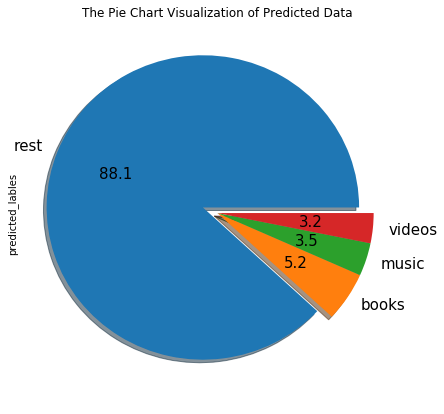

In [13]:
from sklearn.tree import DecisionTreeClassifier
print('training the best model started')
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
print('training the best model competed')

test_dataset=pd.read_csv('evaluation.csv')
test_dataset.head()
print('original test dataset size ', test_dataset.shape[0])
test_dataset.dropna(subset=['breadcrumbs'],inplace=True)
print('test dataset size after droping NaN ', test_dataset.shape[0])

print('transforming testdataset started')
testset_tran=count_vec.transform(test_dataset.breadcrumbs)
print('transforming testdataset competed')

print('predicting testdataset started')
predicted_lables=clf.predict(testset_tran)
print('predicting testdataset completed')

test_dataset['predicted_lables']=le.inverse_transform(predicted_lables)
test_dataset.to_csv('predicted_output.csv')
print('wrote predicted output to the file sucessfully !!!')

test_dataset.predicted_lables.value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',shadow=True,
                               title='The Pie Chart Visualization of Predicted Data',explode=(0.1,0,0,0),fontsize=15)